In [2]:
#!pip install -e ../Maccabee > /dev/null

In [1]:
from maccabee.data_generation.utils import CompiledExpression, evaluate_expression
from sympy.abc import x, y
import sympy as sp
from itertools import combinations
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_obs=1000
n_covars = 10

def run_trial(n_obs, n_covars, compile_expression=True, n_evals=40):
    covar_names = [f"x{i}" for i in range(n_covars)]
    covar_symbols = sp.symbols(covar_names)
    interactions = [a*b for a, b in combinations(covar_symbols, 2)]
    expression = np.sum(covar_symbols) + np.sum(interactions)
    
    n_eff_covars = n_covars + len(interactions)
    
    data = np.random.normal(size=(n_obs, n_covars))
    df = pd.DataFrame(data, columns=covar_names)
    
    if compile_expression:
        compile_times = []
        for _ in range(1):
            start = time()
            c = CompiledExpression(expression)
            end = time()
            compile_times.append(end - start)

        compile_time = np.mean(compile_times)
    else:
        compile_time = 0
    
    eval_times = []
    start = time()
    
    for _ in range(n_evals):
        if compile_expression:
            val = c.eval_expr(df)
        else:
            val = evaluate_expression(expression, df)
        assert(len(val) == n_obs)
        
    end = time()
    eval_time = end - start
    
    return compile_time, eval_time, n_eff_covars

In [4]:
run_trial(1000, 32, compile_expression=True)

(4.129603385925293, 0.04166436195373535, 528)

In [5]:
N = 1000
n_covars = range(2, 40, 5)

In [6]:
compile_data = []
for n_covar in n_covars:
    print("Running at ", n_covar)
    compile_data.append(run_trial(N, n_covar))

Running at  2
Running at  7
Running at  12
Running at  17
Running at  22
Running at  27
Running at  32
Running at  37


In [7]:
no_compile_data = []
for n_covar in n_covars:
    print("Running at ", n_covar)
    no_compile_data.append(run_trial(N, n_covar, compile_expression=False))

Running at  2
Running at  7
Running at  12
Running at  17
Running at  22
Running at  27
Running at  32
Running at  37


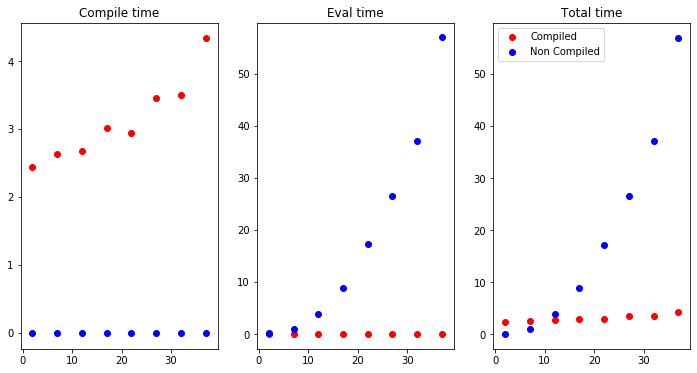

In [8]:
compile_data = np.array(compile_data)
no_compile_data = np.array(no_compile_data)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title("Compile time")
plt.scatter(n_covars, compile_data[:, 0], label="Compiled", c="r")
plt.scatter(n_covars, no_compile_data[:, 0], label="Non Compiled", c="b")

plt.subplot(132)
plt.title("Eval time")
plt.scatter(n_covars, compile_data[:, 1], label="Compiled", c="r")
plt.scatter(n_covars, no_compile_data[:, 1], label="Non Compiled", c="b")

plt.subplot(133)
plt.title("Total time")
plt.scatter(n_covars, compile_data[:, 1] + compile_data[:, 0], label="Compiled", c="r")
plt.scatter(n_covars, no_compile_data[:, 1] + no_compile_data[:, 0], label="Non Compiled", c="b")


plt.legend()
plt.show()

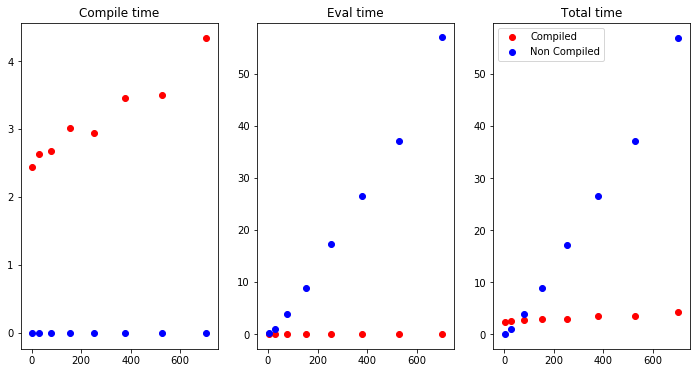

In [9]:
compile_data = np.array(compile_data)
no_compile_data = np.array(no_compile_data)

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title("Compile time")
plt.scatter(compile_data[:, 2], compile_data[:, 0], label="Compiled", c="r")
plt.scatter(no_compile_data[:, 2], no_compile_data[:, 0], label="Non Compiled", c="b")

plt.subplot(132)
plt.title("Eval time")
plt.scatter(compile_data[:, 2], compile_data[:, 1], label="Compiled", c="r")
plt.scatter(no_compile_data[:, 2], no_compile_data[:, 1], label="Non Compiled", c="b")

plt.subplot(133)
plt.title("Total time")
plt.scatter(compile_data[:, 2], compile_data[:, 1] + compile_data[:, 0], label="Compiled", c="r")
plt.scatter(no_compile_data[:, 2], no_compile_data[:, 1] + no_compile_data[:, 0], label="Non Compiled", c="b")

plt.legend()
plt.show()